In [205]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import itertools
import mdptoolbox.example
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
import quantecon as qe
from quantecon.markov import DiscreteDP

# Case I: Forest Management

-  Forest has N states, {0: Youngest, 1: medium, ...., N-1: oldest}
- Actions, {0: wait, 1: cut}; When "cut", forest return to the youngest state
- Rewards, r=4 when the forest is in the oldest state and we choose "wait" action; r=2 when choosing "cut" in the oldest state of the forest; when choose to "cut" in any states besides youngest and oldest, r=1
- Each year, there is a probability p that forest is burnt down

ref: https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

In [396]:
# P = transition probability matrix
# R = reward matrix
P, R = mdptoolbox.example.forest(10, 4, 2, 0.1)

In [397]:
P

array([[[0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9]],

       [[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. ,

In [398]:
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [4., 2.]])

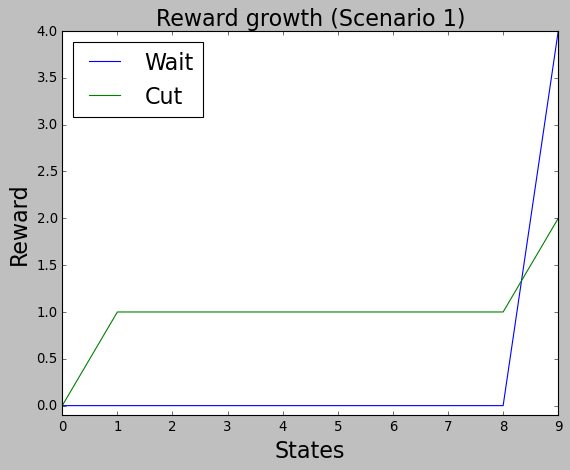

In [399]:
mpl.style.use('classic')
plt.plot(R[:,0], label='Wait')
plt.plot(R[:,1], label='Cut')
plt.title('Reward growth (Scenario 1)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Reward', fontsize=20)
plt.ylim(-0.1)
plt.legend(fontsize=20, loc=2)
plt.savefig('mdp_fig0', bbox_inches='tight');

In [400]:
# solve with policy iteration
# discount: 0.95
pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.95)
pi.setVerbose()
pi.run()

  Iteration		Number of different actions
    1		  1
    2		  1
    3		  1
    4		  1
    5		  1
    6		  1
    7		  1
    8		  1
    9		  0
Iterating stopped, unchanging policy found.


discount = 0.7: number of cuts = 4
discount = 0.75: number of cuts = 4
discount = 0.8: number of cuts = 3
discount = 0.85: number of cuts = 1
discount = 0.9: number of cuts = 0
discount = 0.95: number of cuts = 0


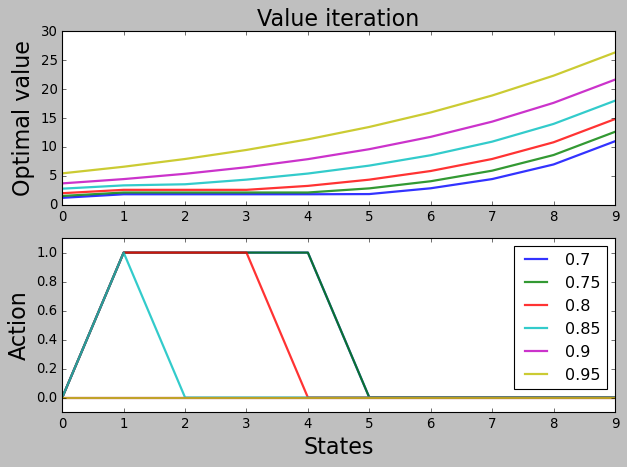

In [401]:
# solve with value iteration

mpl.style.use('classic')
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i in discounts:
    vi = mdptoolbox.mdp.ValueIteration(P, R, i)
    vi.run()
    ax1.plot(vi.V, linewidth=2, alpha=0.8)
    ax2.plot(vi.policy, linewidth=2, alpha=0.8)
    print('discount = {}: number of cuts = {}'.format(i, sum(vi.policy)))

#ax1.set_xlabel('States', fontsize=20)
ax1.set_title('Value iteration', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1,1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp_fig1', bbox_inches='tight')

discount = 0.7: number of cuts is 4
discount = 0.75: number of cuts is 4
discount = 0.8: number of cuts is 3
discount = 0.85: number of cuts is 1
discount = 0.9: number of cuts is 0
discount = 0.95: number of cuts is 0


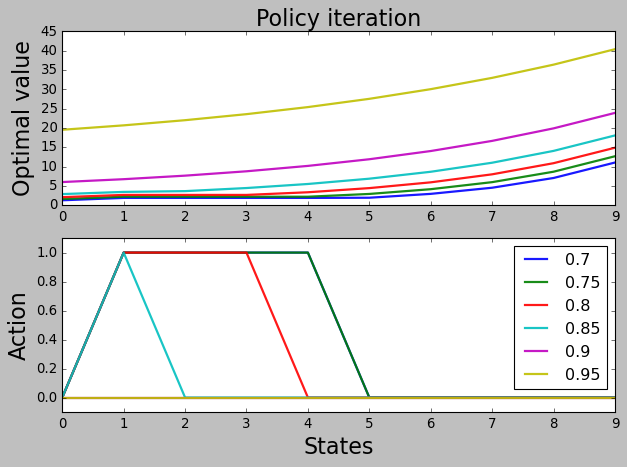

In [402]:
# solve with policy iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i in discounts:
    pi = mdptoolbox.mdp.PolicyIteration(P, R, i)
    pi.run()
    ax1.plot(pi.V, linewidth=2, alpha=0.9)
    ax2.plot(pi.policy, linewidth=2, alpha=0.9)
    print('discount = {}: number of cuts is {}'.format(i, sum(pi.policy)))

#ax1.set_xlabel('States', fontsize=15)
ax1.set_title('Policy iteration', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp_fig2', bbox_inches='tight')

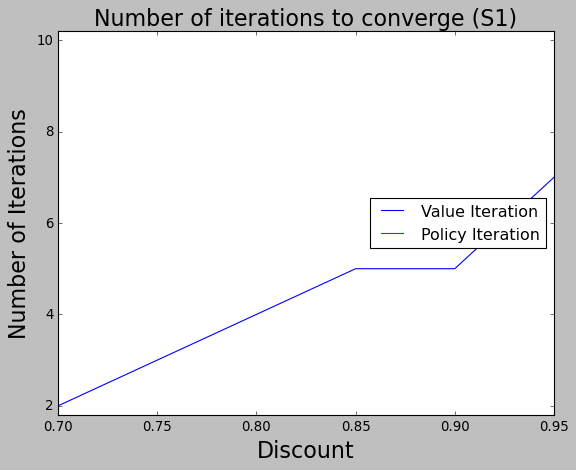

In [403]:
plt.plot(discounts, pi_iters)
plt.plot(discounts, vi_iters)
plt.title('Number of iterations to converge (S1)', fontsize=20)
plt.legend(['Value Iteration', 'Policy Iteration'], loc=5)
plt.xlabel('Discount', fontsize=20)
plt.ylabel('Number of Iterations', fontsize=20)
plt.ylim(1.5, 10,5)
plt.ylim(1.8, 10.2)
plt.savefig('mdp1_fig3')

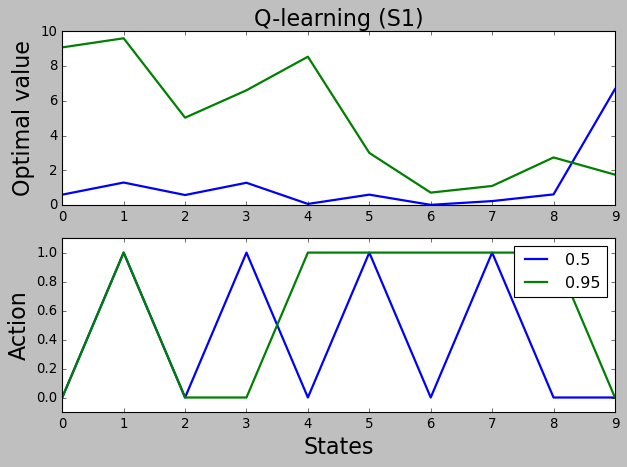

In [404]:
# Solve the problem with Q learning
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.95]
for i in discounts:
    qlearner = mdptoolbox.mdp.QLearning(P, R, i)
    qlearner.run()
    ax1.plot(qlearner.V, linewidth=2)
    ax2.plot(qlearner.policy, linewidth=2)

ax1.set_title('Q-learning (S1)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_ylim()
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig19')

In [349]:
print('It takes {} ms for Q-learning'.format(qlearner.time * 10**3))
qlearner.policy

It takes 168.87402534484863 ms for Q-learning


(0, 1, 0, 1, 1, 0, 0, 0, 0, 1)

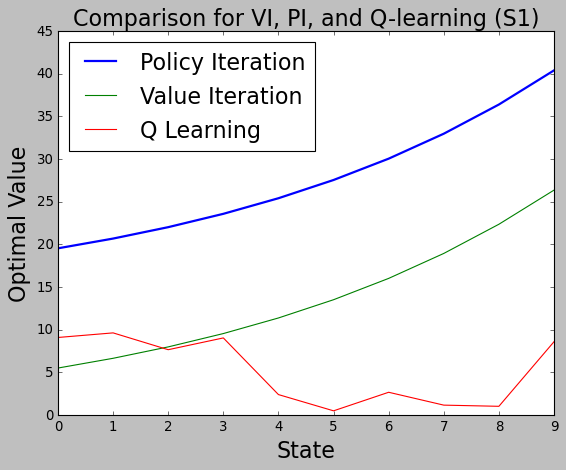

In [383]:
plt.plot(pi.V, linewidth=2)
plt.plot(vi.V)
plt.plot(qlearner.V)
plt.title('Comparison for VI, PI, and Q-learning (S1)', fontsize=20)
plt.ylabel('Optimal Value', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'], loc=2, fontsize=20)
plt.savefig('mdp1_fig21')

For both value and policy iterations, a larger discount factor which takes more into account future rewards provide higher optimal values.

# Rewards change with the state of the forest

In [235]:
# change the reward array to be more releastic
P, R = mdptoolbox.example.forest(10, 4, 2, 0.1)
R[:,0] = [x**2/7 for x in range(0, 10)] # the reward of waiting grows quadratically with the state of the forest
R[:,1] = range(0, 10) # the reward of cut also growes linearly with the state of the forest
R

array([[ 0.        ,  0.        ],
       [ 0.14285714,  1.        ],
       [ 0.57142857,  2.        ],
       [ 1.28571429,  3.        ],
       [ 2.28571429,  4.        ],
       [ 3.57142857,  5.        ],
       [ 5.14285714,  6.        ],
       [ 7.        ,  7.        ],
       [ 9.14285714,  8.        ],
       [11.57142857,  9.        ]])

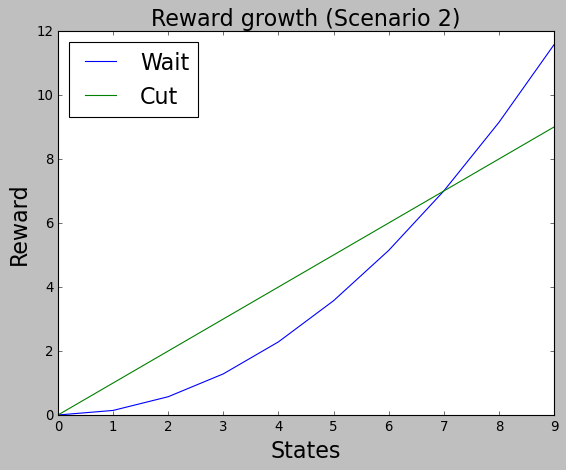

In [236]:
mpl.style.use('classic')
plt.plot(R[:,0], label='Wait')
plt.plot(R[:,1], label='Cut')
plt.title('Reward growth (Scenario 2)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Reward', fontsize=20)
plt.legend(fontsize=20, loc=2)
plt.savefig('mdp_fig3', bbox_inches='tight');

discount = 0.5: number of cuts is 1
discount = 0.6: number of cuts is 0
discount = 0.7: number of cuts is 0
discount = 0.8: number of cuts is 0
discount = 0.9: number of cuts is 0
discount = 0.95: number of cuts is 0


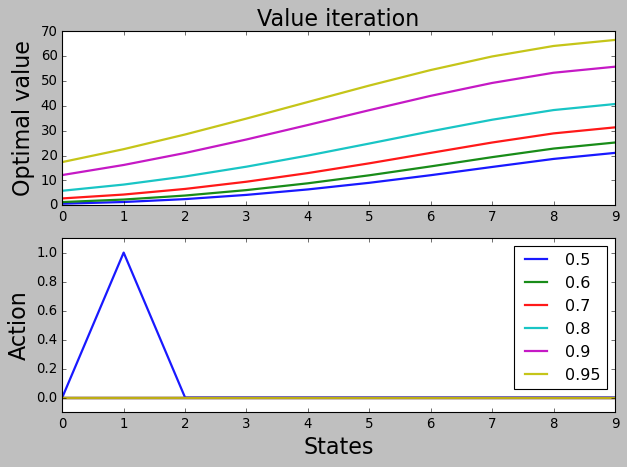

In [237]:
# solve with value iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
vi_iters = []
for i in discounts:
    vi = mdptoolbox.mdp.ValueIteration(P, R, i)
    vi.run()
    vi_iters.append(vi.iter)
    ax1.plot(vi.V, linewidth=2, alpha=0.9)
    ax2.plot(vi.policy, linewidth=2, alpha=0.9)
    print('discount = {}: number of cuts is {}'.format(i, sum(vi.policy)))

#ax1.set_xlabel('States')
ax1.set_title('Value iteration', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp_fig4')

discount = 0.5: number of cuts is 1
discount = 0.6: number of cuts is 0
discount = 0.7: number of cuts is 0
discount = 0.8: number of cuts is 0
discount = 0.9: number of cuts is 0
discount = 0.95: number of cuts is 0


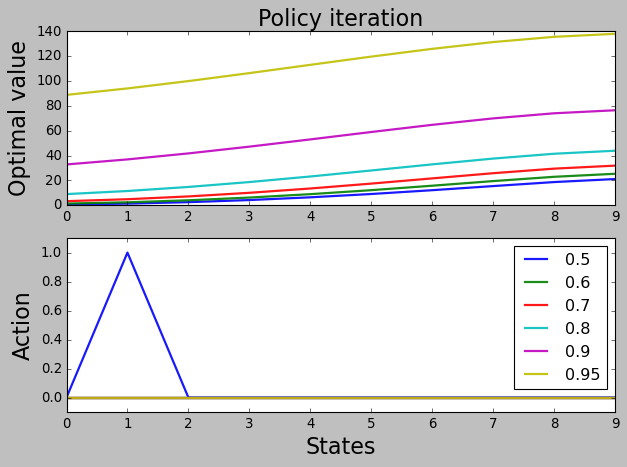

In [238]:
# solve with policy iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
pi_iters = []
for i in discounts:
    pi = mdptoolbox.mdp.PolicyIteration(P, R, i)
    pi.run()
    pi_iters.append(pi.iter)
    ax1.plot(pi.V, linewidth=2, alpha=0.9)
    ax2.plot(pi.policy, linewidth=2, alpha=0.9)
    print('discount = {}: number of cuts is {}'.format(i, sum(pi.policy)))

#ax1.set_xlabel('States', fontsize=20)
ax1.set_title('Policy iteration', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp_fig5')

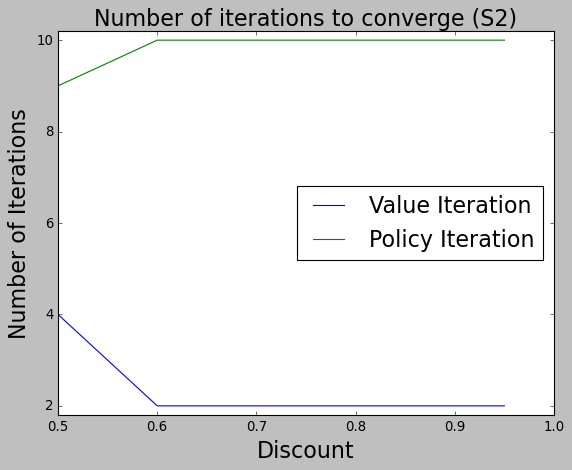

In [239]:
plt.plot(discounts, pi_iters)
plt.plot(discounts, vi_iters)
plt.title('Number of iterations to converge (S2)', fontsize=20)
plt.legend(['Value Iteration', 'Policy Iteration'], fontsize=20, loc=5)
plt.xlabel('Discount', fontsize=20)
plt.ylabel('Number of Iterations', fontsize=20)
plt.ylim(1.8, 10.2)
plt.savefig('mdp1_fig6')

# Fire risk grows linearly with the forest state

In [335]:
# change the transition probability only
P, R = mdptoolbox.example.forest(10, 4, 2, 0.1)
fire_increment = 0.01
for i in range(1, 10-1):
    P[0, i, 0] = 0.1 + fire_increment * i # as the forest grows, the fire risk increases linearly
    P[0, i, i + 1] = 0.9 - fire_increment * i
P[0, 9, 9] = 0.9 - fire_increment*9
P[0, 9, 0] = 0.1 + fire_increment*9
P[0, :, :]

array([[0.1 , 0.9 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.12, 0.  , 0.  , 0.88, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.13, 0.  , 0.  , 0.  , 0.87, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.14, 0.  , 0.  , 0.  , 0.  , 0.86, 0.  , 0.  , 0.  , 0.  ],
       [0.15, 0.  , 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.84, 0.  , 0.  ],
       [0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.83, 0.  ],
       [0.18, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.82],
       [0.19, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.81]])

discount = 0.5: number of cuts is 7
discount = 0.6: number of cuts is 6
discount = 0.7: number of cuts is 5
discount = 0.8: number of cuts is 4
discount = 0.9: number of cuts is 2
discount = 0.95: number of cuts is 0


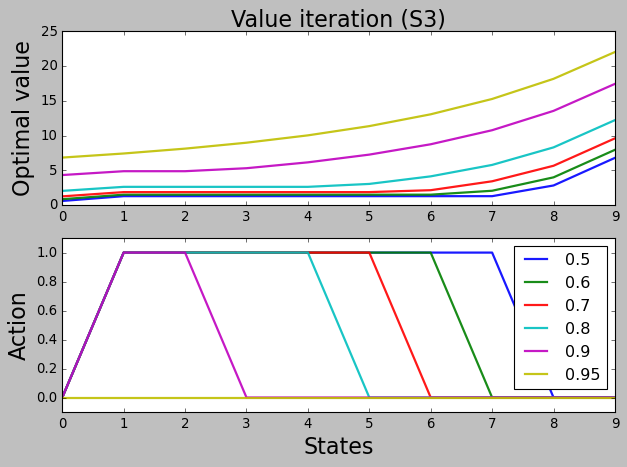

In [336]:
# solve with value iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
vi_iters = []
for i in discounts:
    vi = mdptoolbox.mdp.ValueIteration(P, R, i)
    vi.run()
    ax1.plot(vi.V, linewidth=2, alpha=0.9)
    ax2.plot(vi.policy, linewidth=2, alpha=0.9)
    vi_iters.append(vi.iter)
    print('discount = {}: number of cuts is {}'.format(i, sum(vi.policy)))

#ax1.set_xlabel('States', fontsize=20)
ax1.set_title('Value iteration (S3)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig7')

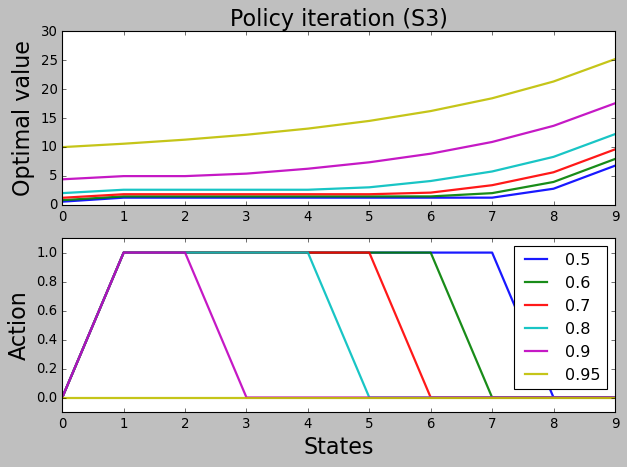

In [337]:
# solve with policy iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
pi_iters = []
for i in discounts:
    pi = mdptoolbox.mdp.PolicyIteration(P, R, i)
    pi.run()
    ax1.plot(pi.V, linewidth=2, alpha=0.9)
    ax2.plot(pi.policy, linewidth=2, alpha=0.9)
    pi_iters.append(pi.iter)

#ax1.set_xlabel('States')
ax1.set_title('Policy iteration (S3)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig8')

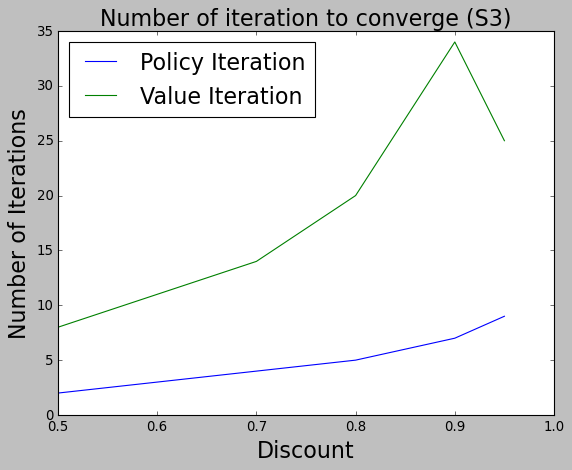

In [338]:
plt.plot(discounts, pi_iters)
plt.plot(discounts, vi_iters)
plt.title('Number of iteration to converge (S3)', fontsize=20)
plt.legend(['Policy Iteration', 'Value Iteration'], fontsize=20, loc=2)
plt.xlabel('Discount', fontsize=20)
plt.ylabel('Number of Iterations', fontsize=20)
plt.savefig('mdp1_fig9')

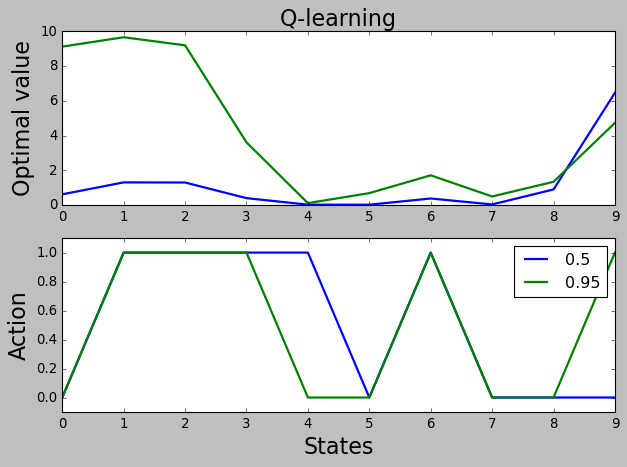

In [339]:
# Solve the problem with Q learning
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.95]
for i in discounts:
    qlearner = mdptoolbox.mdp.QLearning(P, R, i)
    qlearner.run()
    ax1.plot(qlearner.V, linewidth=2)
    ax2.plot(qlearner.policy, linewidth=2)

ax1.set_title('Q-learning', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_ylim()
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig18')

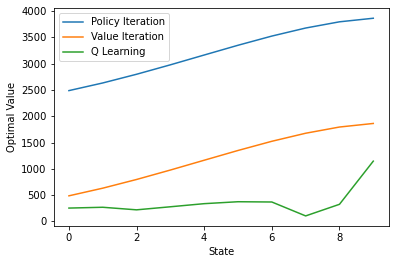

In [21]:
plt.plot(pi.V)
plt.plot(vi.V)
plt.plot(qlearner.V)
plt.ylabel('Optimal Value')
plt.xlabel('State')
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'])

In [8]:
print('The best policy from policy iteration is {}'.format(pi.policy))
print('It takes {} iteractions to converge for policy iteration'.format(pi.iter))
print('It takes {} ms for policy iteration'.format(pi.time * 10**3))

The best policy from policy iteration is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
It takes 9 iteractions to converge for policy iteration
It takes 8.172035217285156 ms for policy iteration


In [9]:
print('The best policy from value iteration is {}'.format(vi.policy))
print('It takes {} iterations to converge for value iteration'.format(vi.iter))
print('It takes {} ms for value iteration'.format(vi.time * 10**3))

The best policy from value iteration is (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
It takes 14 iterations to converge for value iteration
It takes 3.3800601959228516 ms for value iteration


- both value iteration and policy iteraction choose to wait when fire risk is small
- Value iteration takes more steps to converge

- Both iteration found the same policy, which is to cut the forest at year 2-5, and wait afterwards
- It takes longer for value iteration to converge

- Conclusion: 
    - For this simple MDP problem, both iteration methods found the same policy
    - Policy iteration converges in less iterations compared to value iteration
    - Value iteration is faster in running time
    

#Notes:
    - Policy iteration requires fewer iterations that value iteration, but each iteration requires solving a linear system instead of just applying Bellman operator
    
    - In practice, policy iteration is often faster, especially if the transition probabilities are structured (e.g., sparse) to make solution of linear system efficient

In [22]:
# Solve the problem with Q learning
qlearner = mdptoolbox.mdp.QLearning(P, R, 0.9, n_iter=100000)
qlearner.setVerbose()
qlearner.run()

In [23]:
qlearner.Q

array([[ 564.29657025,  241.81586449],
       [ 673.39027741,  268.2602655 ],
       [ 807.41705584,  278.78028706],
       [ 966.07154971,  304.27867877],
       [1148.95973098,  158.04511678],
       [1325.97480881,  147.11707691],
       [1518.12951254,  155.58861627],
       [1686.9985036 ,  136.28766659],
       [1820.67848096,  154.40001514],
       [1933.29520195,  490.75739896]])

In [24]:
qlearner.policy

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

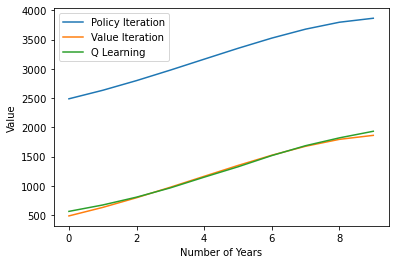

In [25]:
plt.plot(pi.V)
plt.plot(vi.V)
plt.plot(qlearner.V)
plt.ylabel('Value')
plt.xlabel('Number of Years')
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'])

## Modified rewards and fire risk

In [385]:
# change the rewards and transition probability
P, R = mdptoolbox.example.forest(1000, 4, 2, 0.1)
fire_increment = 0.0001
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [4., 2.]])

In [386]:
P.shape

(2, 1000, 1000)

In [387]:
for i in range(1, 1000-1):
    P[0, i, 0] = 0.1 + fire_increment * i # as the forest grows, the fire risk increases linearly
    P[0, i, i + 1] = 0.9 - fire_increment * i
P[0, 999, 999] = 0.9 - fire_increment*999
P[0, 999, 0] = 0.1 + fire_increment*999

R[:,0] = [x**2/900 for x in range(0, 1000)] # the reward of waiting grows quadratically with the state of the forest
R[:,1] = range(0, 1000) # the reward of cut also growes linearly with the state of the forest

print(R)
print(P[1, :, :])

[[0.00000000e+00 0.00000000e+00]
 [1.11111111e-03 1.00000000e+00]
 [4.44444444e-03 2.00000000e+00]
 ...
 [1.10445444e+03 9.97000000e+02]
 [1.10667111e+03 9.98000000e+02]
 [1.10889000e+03 9.99000000e+02]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


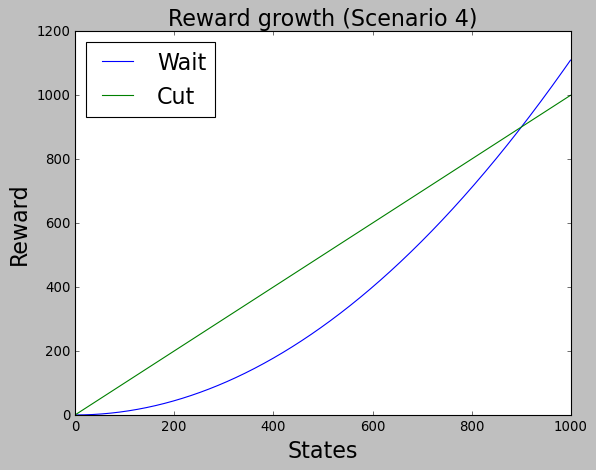

In [388]:
mpl.style.use('classic')
plt.plot(R[:,0], label='Wait')
plt.plot(R[:,1], label='Cut')
plt.title('Reward growth (Scenario 4)', fontsize=20)
plt.xlabel('States', fontsize=20)
plt.ylabel('Reward', fontsize=20)
plt.ylim(-0.1)
plt.legend(fontsize=20, loc=2)
plt.savefig('mdp1_fig13', bbox_inches='tight');

discount = 0.5: number of cuts is 517
discount = 0.6: number of cuts is 435
discount = 0.7: number of cuts is 351
discount = 0.8: number of cuts is 266
discount = 0.9: number of cuts is 178
discount = 0.95: number of cuts is 132


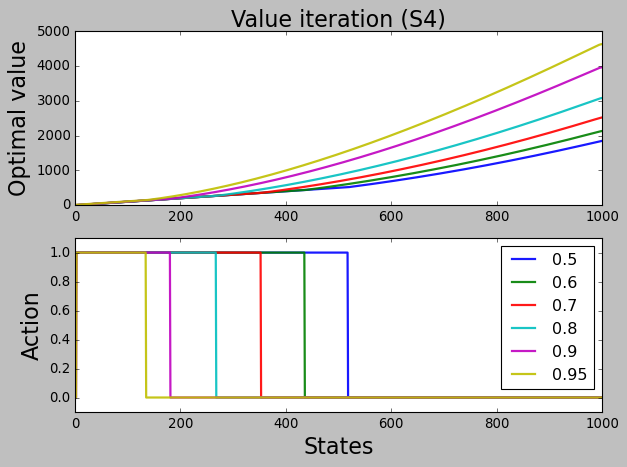

In [389]:
# solve with value iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
vi_iters = []
for i in discounts:
    vi = mdptoolbox.mdp.ValueIteration(P, R, i)
    vi.run()
    ax1.plot(vi.V, linewidth=2, alpha=0.9)
    ax2.plot(vi.policy, linewidth=2, alpha=0.9)
    vi_iters.append(vi.iter)
    print('discount = {}: number of cuts is {}'.format(i, sum(vi.policy)))

#ax1.set_xlabel('States', fontsize=20)
ax1.set_title('Value iteration (S4)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts, loc=1)
plt.tight_layout()
plt.savefig('mdp1_fig14')

discount = 0.5: number of cuts is 517
discount = 0.6: number of cuts is 435
discount = 0.7: number of cuts is 351
discount = 0.8: number of cuts is 266
discount = 0.9: number of cuts is 178
discount = 0.95: number of cuts is 132


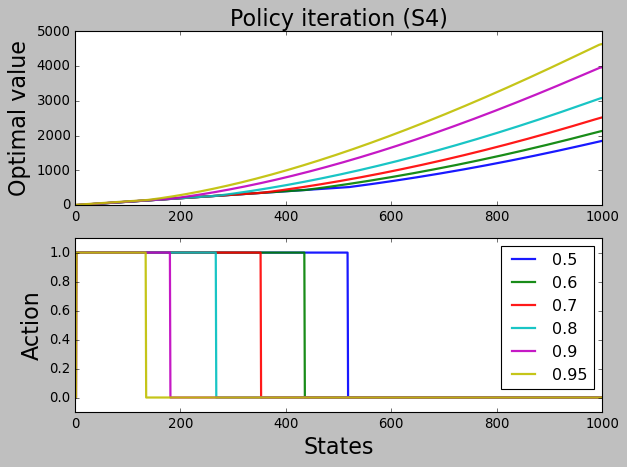

In [390]:
# solve with policy iteration
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
pi_iters = []
for i in discounts:
    pi = mdptoolbox.mdp.PolicyIteration(P, R, i)
    pi.run()
    ax1.plot(pi.V, linewidth=2, alpha=0.9)
    ax2.plot(pi.policy, linewidth=2, alpha=0.9)
    pi_iters.append(pi.iter)
    print('discount = {}: number of cuts is {}'.format(i, sum(pi.policy)))

#ax1.set_xlabel('States')
ax1.set_title('Policy iteration (S4)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_legend(discounts)
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig15')

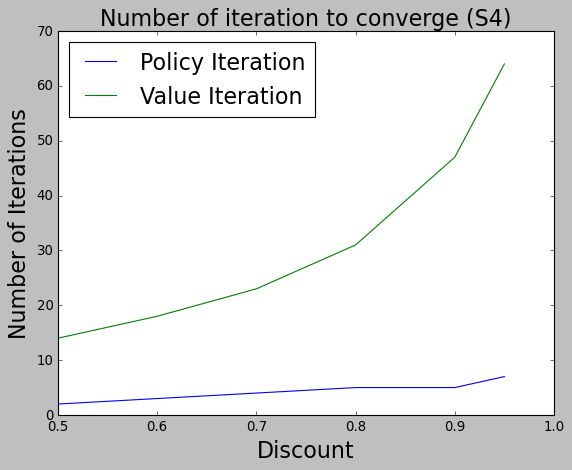

In [391]:
plt.plot(discounts, pi_iters)
plt.plot(discounts, vi_iters)
plt.title('Number of iteration to converge (S4)', fontsize=20)
plt.legend(['Policy Iteration', 'Value Iteration'], fontsize=20, loc=2)
plt.xlabel('Discount', fontsize=20)
plt.ylabel('Number of Iterations', fontsize=20)
plt.savefig('mdp1_fig16')

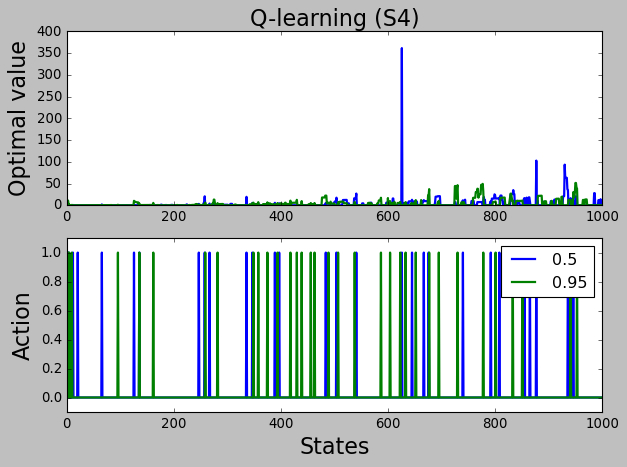

In [392]:
# Solve the problem with Q learning
fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.95]
for i in discounts:
    qlearner = mdptoolbox.mdp.QLearning(P, R, i)
    qlearner.run()
    ax1.plot(qlearner.V, linewidth=2)
    ax2.plot(qlearner.policy, linewidth=2)

ax1.set_title('Q-learning (S4)', fontsize=20)
ax1.set_ylabel('Optimal value', fontsize=20)
#ax1.set_ylim()
ax2.set_xlabel('States', fontsize=20)
ax2.set_ylabel('Action', fontsize=20)
ax2.set_ylim(-0.1, 1.1)
plt.legend(discounts)
plt.tight_layout()
plt.savefig('mdp1_fig17')

In [393]:
sum(qlearner.policy)

35

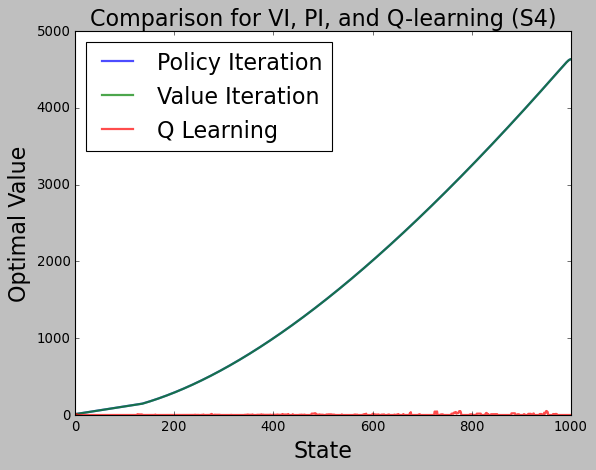

In [394]:
plt.plot(pi.V, linewidth=2, alpha=0.7)
plt.plot(vi.V, linewidth=2, alpha=0.7)
plt.plot(qlearner.V, linewidth=2, alpha=0.7)
plt.title('Comparison for VI, PI, and Q-learning (S4)', fontsize=20)
plt.ylabel('Optimal Value', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'], loc=2, fontsize=20)
plt.savefig('mdp1_fig20')

In [395]:
# number of iterations and time to converge
print('It takes {} iteractions to converge for policy iteration'.format(vi.iter))
print('It takes {} ms for value iteration'.format(vi.time * 10**3))
print('It takes {} iteractions to converge for policy iteration'.format(pi.iter))
print('It takes {} ms for policy iteration'.format(pi.time * 10**3))
print('It takes {} ms for Q-learning'.format(qlearner.time * 10**3))

It takes 64 iteractions to converge for policy iteration
It takes 39.5960807800293 ms for value iteration
It takes 7 iteractions to converge for policy iteration
It takes 122.47300148010254 ms for policy iteration
It takes 314.59784507751465 ms for Q-learning


In [334]:
print('Mean discrepancy for Q-learner over 100 iterations: {}'.format(qlearner.mean_discrepancy))
print('It takes {} ms for Q-learning'.format(qlearner.time * 10**3))

Mean discrepancy for Q-learner over 100 iterations: [20.028062829781923, 1.898537674092524, 7.323261490968162, 3.1044756574301733, 0.6482035395457221, 0.6545018562040192, 0.3807141498075747, 0.3543610683849076, 0.031864806401328404, 0.06914517057544657, 0.3540179068374511, 0.31686634502564553, 0.17216349794040678, 0.7554877549625809, 0.1585869349224383, 0.7751366350199043, 0.2249963059267681, 0.21858883222876827, 0.27180567000800204, 0.09908374806413608, 0.19330312916462755, 0.6575516337626803, 0.3249662505519986, 0.315072691538424, 0.16639741193892454, 0.04141600563206685, 0.0318858977126839, 0.2531623286083551, 0.03275943003346654, 0.10857384669102942, 0.1925767635458673, 0.015999705863223444, 0.04654519370321039, 0.13860743266507972, 0.5053645564330398, 0.09938958677497983, 0.1328998154498731, 0.18783517768652644, 0.6732435549245495, 0.16780242705540846, 1.284458612650121, 0.430468043451862, 0.5034326352233551, 0.14106999143849205, 0.21061719248079114, 0.2998450272353929, 0.67432770

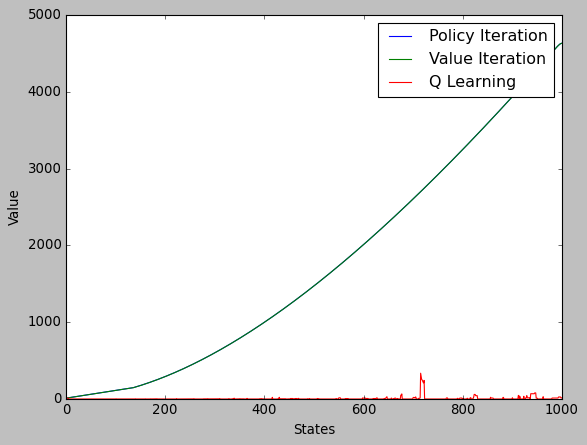

In [329]:
plt.plot(pi.V)
plt.plot(vi.V)
plt.plot(qlearner.V)
plt.ylabel('Value')
plt.xlabel('States')
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'])

# Case II: Automobile replacement

- Automobile needs maintenance, use MDP to determine when to keep the car and when to replace it. 

In [35]:
lambd = 0.5        # Exponential distribution parameter
c = 200            # (Constant) marginal cost of maintainance
net_price = 10**5  # Replacement cost

In [44]:

n = 300  # Number of states; s = 0, ..., n-1: level of utilization of the asset
m = 2    # Number of actions; 0: keep, 1: replace

In [45]:
# Reward array
R = np.empty((n, m))
R[:, 0] = -c * np.arange(n)   # Costs for maintainance
R[:, 1] = -net_price - c * 0  # Costs for replacement

In [46]:
# Transition probability array
# For each state s, s' distributes over
# s, s+1, ..., min{s+supp_size-1, n-1} if a = 0
# 0, 1, ..., supp_size-1 if a = 1
# according to the (discretized and truncated) exponential distribution
# with parameter lambd
supp_size = 12
probs = np.empty(supp_size)
probs[0] = 1 - np.exp(-lambd * 0.5)
for j in range(1, supp_size-1):
    probs[j] = np.exp(-lambd * (j - 0.5)) - np.exp(-lambd * (j + 0.5))
probs[supp_size-1] = 1 - np.sum(probs[:-1])

Q = np.zeros((m, n , n))

# a = 0
for i in range(n-supp_size):
    Q[0, i, i:i+supp_size] = probs
for k in range(supp_size):
    Q[0, n-supp_size+k, n-supp_size+k:] = probs[:supp_size-k]/probs[:supp_size-k].sum()

# a = 1
for i in range(n):
    Q[1, i, :supp_size] = probs

In [49]:
# Discount factor
beta = 0.90

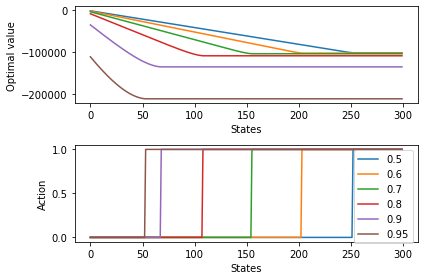

In [52]:
# solve with Policy Iteration
# discount: 0.95

fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
pi_iters = []
for i in discounts:
    
    pi = mdptoolbox.mdp.PolicyIteration(Q, R, i)
    pi.run()
    ax1.plot(pi.V)
    pi_iters.append(pi.iter)
    ax2.plot(pi.policy)
    
ax1.set_xlabel('States')
ax1.set_ylabel('Optimal value')
#ax1.set_legend(discounts)
ax2.set_xlabel('States')
ax2.set_ylabel('Action')
plt.legend(discounts)
plt.tight_layout()

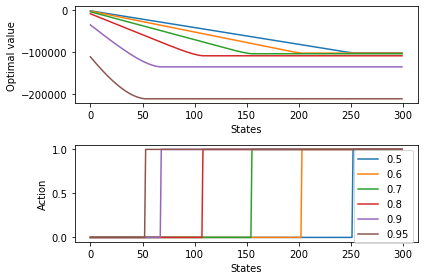

In [55]:
# solve with value iteration
# solve with Policy Iteration
# discount: 0.95

fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
vi_iters = []
for i in discounts:
    
    vi = mdptoolbox.mdp.ValueIteration(Q, R, i)
    vi.run()
    ax1.plot(vi.V)
    ax2.plot(vi.policy)
    vi_iters.append(vi.iter)
    
ax1.set_xlabel('States')
ax1.set_ylabel('Optimal value')
#ax1.set_legend(discounts)
ax2.set_xlabel('States')
ax2.set_ylabel('Action')
plt.legend(discounts)
plt.tight_layout()

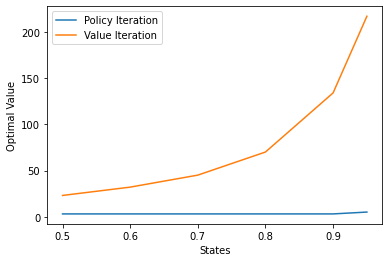

In [57]:
plt.plot(discounts, pi_iters)
plt.plot(discounts, vi_iters)
plt.ylabel('Optimal Value')
plt.xlabel('States')
plt.legend(['Policy Iteration', 'Value Iteration'])

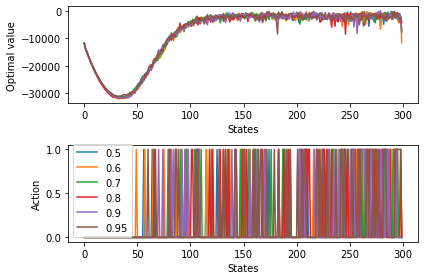

In [59]:
# Solve the problem with Q learning

fig, (ax1, ax2) = plt.subplots(2)
discounts = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
for i in discounts:
    
    qlearner = mdptoolbox.mdp.QLearning(Q, R, beta, n_iter=100000)
    qlearner.run()
    ax1.plot(qlearner.V)
    ax2.plot(qlearner.policy)
    
ax1.set_xlabel('States')
ax1.set_ylabel('Optimal value')
#ax1.set_legend(discounts)
ax2.set_xlabel('States')
ax2.set_ylabel('Action')
plt.legend(discounts)
plt.tight_layout()

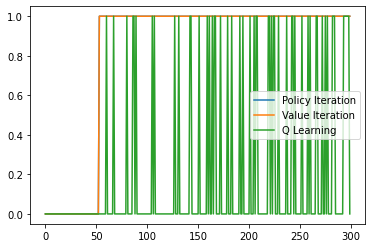

In [60]:
plt.plot(pi.policy)
plt.plot(vi.policy)
plt.plot(qlearner.policy)
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'])

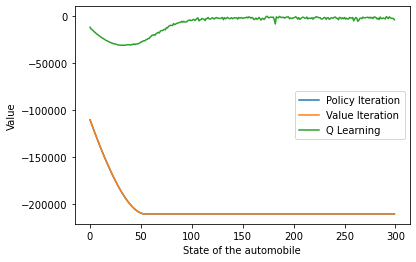

In [61]:
plt.plot(pi.V)
plt.plot(vi.V)
plt.plot(qlearner.V)
plt.ylabel('Value')
plt.xlabel('State of the automobile')
plt.legend(['Policy Iteration', 'Value Iteration', 'Q Learning'])